<a href="https://colab.research.google.com/github/jaiharish07/JAI-HARISH/blob/main/Predicting_Loan_Approvals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING DEPENDENCIES

In [ ]:
import pandas as pd  #used for data manipulation and analysis.
import numpy as np  #used for numerical computing on large arrays and matrices.
import matplotlib.pyplot as plt  #used for creating static, animated, and interactive visualizations in a variety of formats.
import seaborn as sns  #used for high-level interface for creating attractive and informative statistical graphics.
from sklearn.model_selection import train_test_split  #used to split the data into training and testing data.
from sklearn.preprocessing import StandardScaler  #used to standardize the complex values in the dataset inorder to train easily.
from sklearn.preprocessing import LabelEncoder  #used to encode categorical labels as integer numbers.
from sklearn.metrics import accuracy_score  #used to calculate the accuracy of prediction.
from sklearn.ensemble import RandomForestClassifier  #used for building a random forest model for classification tasks.
import warnings  #used to ignore the warnings
warnings.filterwarnings('ignore')  #used to suppress all warnings in Python.

DATA MANIPULATION

In [ ]:
#reading the dataset
data = pd.read_csv("/content/loan_approval_dataset.csv")

In [ ]:
#printing the first 5 rows of the dataset
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
#printing the shape of the dataset
data.shape

(4269, 13)

In [ ]:
#checking for null values
data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [ ]:
#checking the datatypes of each columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
#encoding the categorical names in the columns using labelencoder
encoder = LabelEncoder()
data[' education'] = encoder.fit_transform(data[' education'])
data[' self_employed'] = encoder.fit_transform(data[' self_employed'])
data[' loan_status'] = encoder.fit_transform(data[' loan_status'])

In [ ]:
#spliting the dataset for training.
x = data.drop(columns=[" loan_status","loan_id"],axis=1)
y = data[" loan_status"]

In [ ]:
#statistical analysis of data
data.describe()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000
mean,2135.000000,2.498712,0.497775,0.503631,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,0.377840
std,1232.498479,1.695910,0.500054,0.500045,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,0.484904
min,1.000000,0.000000,0.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,0.000000
25%,1068.000000,1.000000,0.000000,0.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,0.000000
50%,2135.000000,3.000000,0.000000,1.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,0.000000
75%,3202.000000,4.000000,1.000000,1.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,1.000000
max,4269.000000,5.000000,1.000000,1.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07,1.000000


DATA VISUALIZATION

In [ ]:
sns.set()  # sets the aesthetic style of seaborn plots to the default style.

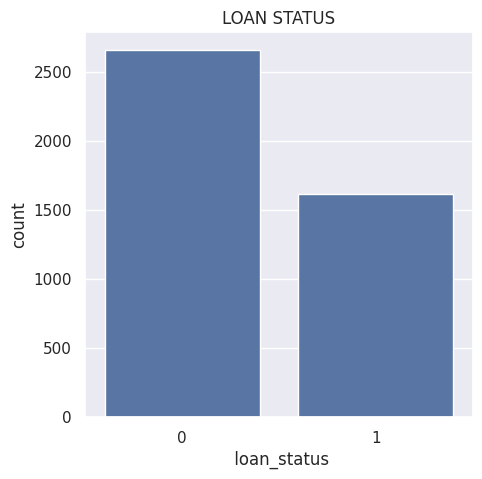

In [ ]:
#countplot for loan status using seaborn
plt.figure(figsize=(5,5))  #plot size
sns.countplot(x=' loan_status',data=data) #0 represents approval and 1 represents rejection
plt.title("LOAN STATUS")  #title for the plot
plt.show()

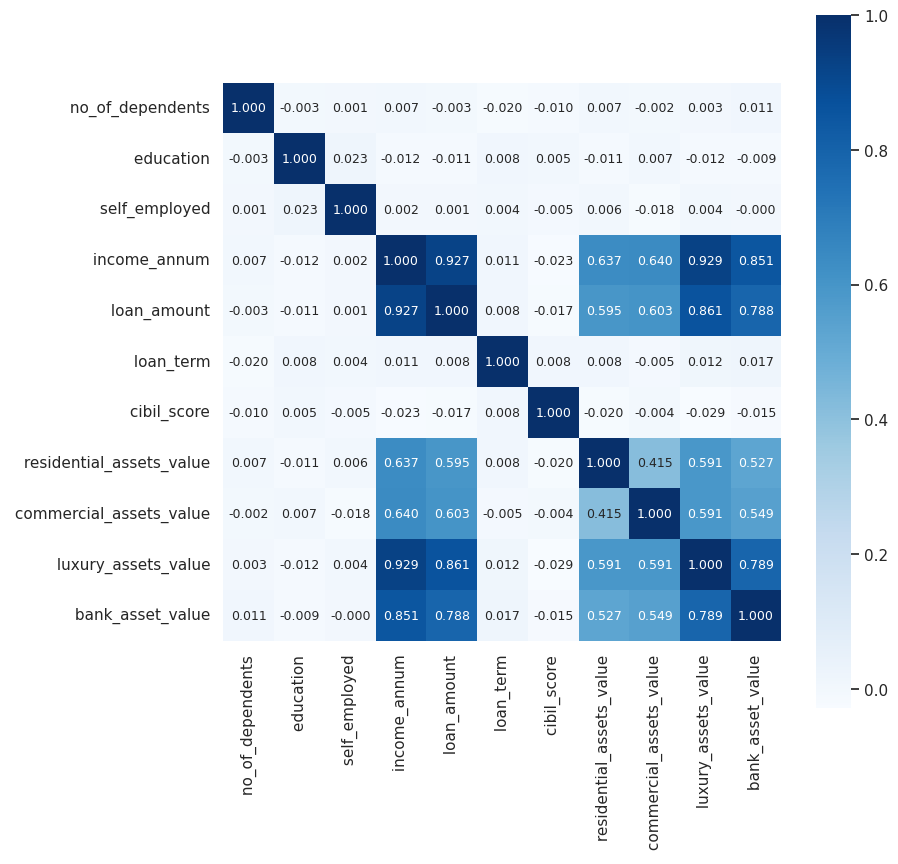

In [ ]:
#creating heatmap using seaborn
plt.figure(figsize=(9,9))
sns.heatmap(x.corr(),cbar=True,square=True,fmt='.3f',annot=True,annot_kws={'size':9},cmap='Blues')
plt.show()

SPLITING THE TRAINING AND TESTING DATA

In [ ]:
#spliting the data for training and testing.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
#testsize represents the size of testing data.testsize of 0.2 represents 20% of data for testing and remaing 80% of data is for training.

In [ ]:
#standardize the complex values using standardscaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  #standardizing the data in x_train
x_test_scaled = scaler.fit_transform(x_test)  #standardizing the data in x_test

MODEL BUILDING

In [ ]:
#loading the svc module and setting the kernel as linear.
model = RandomForestClassifier()

In [ ]:
#fitting the training data into the model
model.fit(x_train_scaled,y_train)

RandomForestClassifier()

In [ ]:
train_prediction = model.predict(x_train_scaled)  #predicting the training data
test_prediction = model.predict(x_test_scaled)  #predicting the testing data

In [ ]:
#calculating the accuracy
train_accuracy = accuracy_score(train_prediction,y_train)  #accuracy score for training
test_accuracy = accuracy_score(test_prediction,y_test)  #accuracy score for testing
print("Accuracy score for training is :",train_accuracy*100,"%")
print("Accuracy score for testing is :",test_accuracy*100,"%")

Accuracy score for training is : 100.0 %
Accuracy score for testing is : 97.07259953161592 %


MODEL EVALUATION

In [ ]:
#prediction for a new data
input_data = (2,	0,	0	,9600000,	29900000,	12,	778	,2400000	,17600000,	22700000,	8000000)

# Reshape input_data to be a 2D array with one row and multiple columns
input_data_2d = np.array(input_data).reshape(1, -1)

# Standardize the complex values in input_data
scaled_data = scaler.transform(input_data_2d)

# Convert the input_data as array using numpy library
new_data = np.asarray(scaled_data)

#new_data prediction
prediction = model.predict(new_data)

if(prediction[0]==0):
    print("The person's loan has approved")
else:
    print("The person's loan has been rejected")

The person's loan has approved
